## Titanic Survival Exploration
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

*Problem Reference* : https://www.kaggle.com/c/titanic

#### Dependencies
* numpy
* pandas
* matplotlib
* scikit-learn
* jupyter notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
# loading training dataset with labels
df = pd.read_csv("data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#Remove the most incompleted fields 
df_reduced = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_clean = df_reduced.dropna()
df_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


In [4]:
from sklearn.feature_extraction import DictVectorizer

In [5]:
# feature extraction from datasets
vec = DictVectorizer(sparse=False)
df_dict = df_clean.to_dict(orient = 'records')
df_dict_feature = vec.fit_transform(df_dict)
df_feature = vec.get_feature_names()
print df_feature
df_dict_feature

['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp', 'Survived']


array([[ 22.,   0.,   0., ...,   1.,   1.,   0.],
       [ 38.,   1.,   0., ...,   0.,   1.,   1.],
       [ 26.,   0.,   0., ...,   0.,   0.,   1.],
       ..., 
       [ 19.,   0.,   0., ...,   0.,   0.,   1.],
       [ 26.,   1.,   0., ...,   1.,   0.,   1.],
       [ 32.,   0.,   1., ...,   1.,   0.,   0.]])

In [6]:
df_final = pd.DataFrame(df_dict_feature,columns=df_feature)
X = df_final.drop('Survived',axis=1)
y = df_final['Survived']
df_final #final prepared dataset with features and labels

,Age,Embarked=C,Embarked=Q,Embarked=S,Fare,Parch,Pclass,Sex=female,Sex=male,SibSp,Survived
0,22.0,0.0,0.0,1.0,7.2500,0.0,3.0,0.0,1.0,1.0,0.0
1,38.0,1.0,0.0,0.0,71.2833,0.0,1.0,1.0,0.0,1.0,1.0
2,26.0,0.0,0.0,1.0,7.9250,0.0,3.0,1.0,0.0,0.0,1.0
3,35.0,0.0,0.0,1.0,53.1000,0.0,1.0,1.0,0.0,1.0,1.0
4,35.0,0.0,0.0,1.0,8.0500,0.0,3.0,0.0,1.0,0.0,0.0
5,54.0,0.0,0.0,1.0,51.8625,0.0,1.0,0.0,1.0,0.0,0.0
6,2.0,0.0,0.0,1.0,21.0750,1.0,3.0,0.0,1.0,3.0,0.0
7,27.0,0.0,0.0,1.0,11.1333,2.0,3.0,1.0,0.0,0.0,1.0
8,14.0,1.0,0.0,0.0,30.0708,0.0,2.0,1.0,0.0,1.0,1.0
9,4.0,0.0,0.0,1.0,16.7000,1.0,3.0,1.0,0.0,1.0,1.0


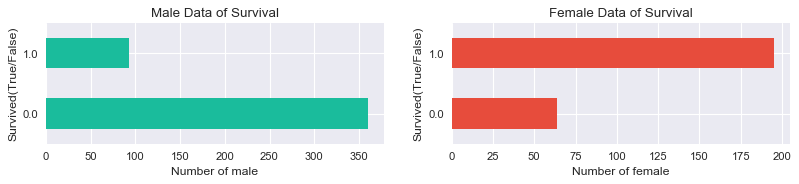

In [7]:
#plotting of some insight of data male vs female
plt.figure(figsize=(12,2),dpi=80)
plt.subplot(1,2,1)
df_male=df_final[df_final['Sex=male']==1]
df_female=df_final[df_final['Sex=female']==1]
df_male['Survived'].value_counts().sort_index().plot(kind='barh',color='#1abc9c')
plt.xlabel('Number of male')
plt.ylabel('Survived(True/False)')
plt.title('Male Data of Survival')
plt.subplot(1,2,2)
df_female['Survived'].value_counts().sort_index().plot(kind='barh',color='#e74c3c')
plt.xlabel('Number of female')
plt.ylabel('Survived(True/False)')
plt.title('Female Data of Survival')
plt.show()

In [8]:
ratio_male= df_male['Survived'].sum()/len(df_male)
ratio_female = df_female['Survived'].sum()/len(df_female)

print 'Ratio of male survival',ratio_male
print 'Ratio of female survival',ratio_female
#As we see female have good chance of survival if you are female then kudos !! sorry boys

Ratio of male survival 0.205298013245
Ratio of female survival 0.752895752896


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42) 

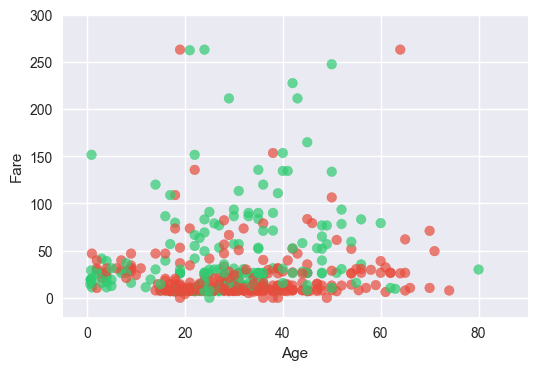

In [10]:
plt.figure(figsize=(6,4),dpi=100)
colors= ['#e74c3c','#2ecc71']
label_name = set(y_train)
plt.scatter(X_train.Age,X_train.Fare,c=y_train,alpha=0.7,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlim(-5,90)
plt.ylim(-20,300)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [11]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf1 = RandomForestClassifier(n_estimators=15)
clf1.fit(X_train,y_train)
y_predict = clf1.predict(X_train)
print 'Model accuracy_score: ',accuracy_score(y_train,y_predict)
y_test_predict = clf1.predict(X_test)
print 'Test accuracy score',accuracy_score(y_test,y_test_predict)

Model accuracy_score:  0.985324947589
Test accuracy score 0.753191489362


In [12]:
# Support vector machine for classification
from sklearn import svm
from sklearn.metrics import accuracy_score
clf2 = svm.SVC(gamma=0.00016,C=1000)
clf2.fit(X_train,y_train)
y_predict = clf2.predict(X_train)
print 'Model accuracy_score: ',accuracy_score(y_train,y_predict)
y_test_predict = clf2.predict(X_test)
print 'Test accuracy score',accuracy_score(y_test,y_test_predict)

Model accuracy_score:  0.834381551363
Test accuracy score 0.782978723404


In [13]:
y_test_main_predict = clf2.predict(X_test)

In [14]:
#final classifier with some good hyperparameter which we learn from tuning
clf3 = svm.SVC(gamma=0.00016,C=1000)
clf3.fit(X,y)
y_trainCSV_predict = clf3.predict(X)
print 'Model accuracy_score: ',accuracy_score(y,y_trainCSV_predict)

Model accuracy_score:  0.824438202247


In [15]:
# Cleaning test data
df_test = pd.read_csv("data/test_corrected.csv")
df_reduced_test = df_test.drop(['PassengerId','Name','Ticket','Cabin','Unnamed: 0'],axis=1)
df_clean_test = df_reduced_test.dropna()
vec_test = DictVectorizer(sparse=False)
df_dict_test = df_clean_test.to_dict(orient = 'records')
df_dict_feature_test = vec_test.fit_transform(df_dict_test)
df_feature_test = vec_test.get_feature_names()
df_final_test = pd.DataFrame(df_dict_feature_test,columns=df_feature_test)
df_final_test

,Age,Embarked=C,Embarked=Q,Embarked=S,Fare,Parch,Pclass,Sex=female,Sex=male,SibSp
0,34.500000,0.0,1.0,0.0,7.8292,0.0,3.0,0.0,1.0,0.0
1,47.000000,0.0,0.0,1.0,7.0000,0.0,3.0,1.0,0.0,1.0
2,62.000000,0.0,1.0,0.0,9.6875,0.0,2.0,0.0,1.0,0.0
3,27.000000,0.0,0.0,1.0,8.6625,0.0,3.0,0.0,1.0,0.0
4,22.000000,0.0,0.0,1.0,12.2875,1.0,3.0,1.0,0.0,1.0
5,14.000000,0.0,0.0,1.0,9.2250,0.0,3.0,0.0,1.0,0.0
6,30.000000,0.0,1.0,0.0,7.6292,0.0,3.0,1.0,0.0,0.0
7,26.000000,0.0,0.0,1.0,29.0000,1.0,2.0,0.0,1.0,1.0
8,18.000000,1.0,0.0,0.0,7.2292,0.0,3.0,1.0,0.0,0.0
9,21.000000,0.0,0.0,1.0,24.1500,0.0,3.0,0.0,1.0,2.0


In [16]:
#After clean test data and we see lots of age are missings .lets write model for predicting age
y_test_predict_final = clf3.predict(df_final_test)
df_test['Survived'] = y_test_predict_final
df_result = df_test[['PassengerId','Survived']]
df_result.to_csv('data/result.csv')

## Results:
The kaggle test data on Final prediction model gives accuracy of 76.56 % . 